In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import calendar
import numpy as np
from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv("documents/sales_data.csv", encoding="ISO-8859-1", delimiter=",")
df['order_date'] = pd.to_datetime(df['order_date'])
df['date'] = df['order_date'].dt.date
df['time'] = df['order_date'].dt.time
df['month_name'] = df['order_date'].dt.month_name()
df.head(10)

,order_id,customer_id,product,category,quantity,price_per_unit,order_date,country,date,time,month_name
0,1000,C081,Comic,Books,4,499.25,2024-11-14 13:46:19.774688,Italy,2024-11-14,13:46:19.774688,November
1,1001,C102,Comic,Books,3,1521.91,2024-12-05 18:05:21.101399,France,2024-12-05,18:05:21.101399,December
2,1002,C130,Headphones,Electronics,3,1665.02,2024-12-28 02:27:23.817143,France,2024-12-28,02:27:23.817143,December
3,1003,C198,Smartphone,Electronics,3,121.76,2024-11-21 09:34:01.499363,Germany,2024-11-21,09:34:01.499363,November
4,1004,C137,Smartphone,Electronics,3,750.71,2025-04-14 03:07:54.143878,France,2025-04-14,03:07:54.143878,April
5,1005,C167,Tablet,Electronics,2,557.10,2025-01-31 01:07:25.343913,Italy,2025-01-31,01:07:25.343913,January
6,1006,C097,Tablet,Electronics,2,228.50,2025-01-26 13:43:48.992520,Netherlands,2025-01-26,13:43:48.992520,January
7,1007,C056,T-Shirt,Clothing,3,781.58,2025-04-19 08:23:14.068446,Italy,2025-04-19,08:23:14.068446,April
8,1008,C132,Comic,Books,4,1200.95,2025-02-13 10:46:24.081574,Spain,2025-02-13,10:46:24.081574,February
9,1009,C009,Smartphone,Electronics,1,21.74,2025-04-28 01:25:39.855245,Netherlands,2025-04-28,01:25:39.855245,April


In [4]:
# Umsatz pro Bestellung
df["total_revenue"] = df.quantity * df.price_per_unit
df.head(10)

,order_id,customer_id,product,category,quantity,price_per_unit,order_date,country,date,time,month_name,total_revenue
0,1000,C081,Comic,Books,4,499.25,2024-11-14 13:46:19.774688,Italy,2024-11-14,13:46:19.774688,November,1997.00
1,1001,C102,Comic,Books,3,1521.91,2024-12-05 18:05:21.101399,France,2024-12-05,18:05:21.101399,December,4565.73
2,1002,C130,Headphones,Electronics,3,1665.02,2024-12-28 02:27:23.817143,France,2024-12-28,02:27:23.817143,December,4995.06
3,1003,C198,Smartphone,Electronics,3,121.76,2024-11-21 09:34:01.499363,Germany,2024-11-21,09:34:01.499363,November,365.28
4,1004,C137,Smartphone,Electronics,3,750.71,2025-04-14 03:07:54.143878,France,2025-04-14,03:07:54.143878,April,2252.13
5,1005,C167,Tablet,Electronics,2,557.10,2025-01-31 01:07:25.343913,Italy,2025-01-31,01:07:25.343913,January,1114.20
6,1006,C097,Tablet,Electronics,2,228.50,2025-01-26 13:43:48.992520,Netherlands,2025-01-26,13:43:48.992520,January,457.00
7,1007,C056,T-Shirt,Clothing,3,781.58,2025-04-19 08:23:14.068446,Italy,2025-04-19,08:23:14.068446,April,2344.74
8,1008,C132,Comic,Books,4,1200.95,2025-02-13 10:46:24.081574,Spain,2025-02-13,10:46:24.081574,February,4803.80
9,1009,C009,Smartphone,Electronics,1,21.74,2025-04-28 01:25:39.855245,Netherlands,2025-04-28,01:25:39.855245,April,21.74


In [5]:
# Gesamtumsatz je Produktkategorie
df_categories = df.groupby("category").agg(Gesamtumsatz=('total_revenue', 'sum')).sort_values("Gesamtumsatz", ascending=False)
df_categories

,Gesamtumsatz
category,
Electronics,873934.79
Home,798591.94
Clothing,758360.34
Books,754027.06


In [6]:
# 5 Produkte mit dem höchsten Gesamtumsatz
df_products = df.groupby("product").agg(Produktumsatz=("total_revenue", "sum")).sort_values("Produktumsatz", ascending=False)
df_products.head(5)

,Produktumsatz
product,
T-Shirt,253000.58
Smartphone,249415.91
Tablet,246239.44
Vacuum Cleaner,223634.27
Laptop,213373.37


In [7]:
# Anzahl eindeutiger Kungen
num_customers = df.customer_id.nunique()
num_customers

198

In [8]:
# Kunde mit Höchstumsatz
highest_customer = df.groupby("customer_id").agg(Kundenumsatz=("total_revenue", "sum")).sort_values("Kundenumsatz", ascending=False)
highest_customer.head(5)

,Kundenumsatz
customer_id,
C105,44949.13
C173,42187.27
C062,39806.58
C013,38714.92
C161,36060.91


In [9]:
# Bestellungen pro Monat
df['month_name'] = df['order_date'].dt.month_name()

df_months_mine = df.groupby("month_name").agg(Bestellungen=("order_id", "count"))
df_months_mine

,Bestellungen
month_name,
April,160
December,176
February,146
January,167
March,167
November,176
October,8


In [10]:
# filter to the “season” and cast to an ordered Categorical
season = ['October','November','December',
          'January','February','March','April']
cat = CategoricalDtype(categories=season, ordered=True)
df_months_chat = df[df['month_name'].isin(season)]
df['month_name'] = df_months_chat['month_name'].astype(cat)

# group & count
month_totals = (
    df
    .groupby('month_name', observed=True)
    .size()
    .reset_index(name='order_count')
)
month_totals

,month_name,order_count
0,October,8
1,November,176
2,December,176
3,January,167
4,February,146
5,March,167
6,April,160


[(0.0, 200.0),
 Text(0.5, 1.0, 'Anzahl der Bestellungen pro Monat'),
 Text(0.5, 0, 'Monat'),
 Text(0, 0.5, 'Bestellungen')]

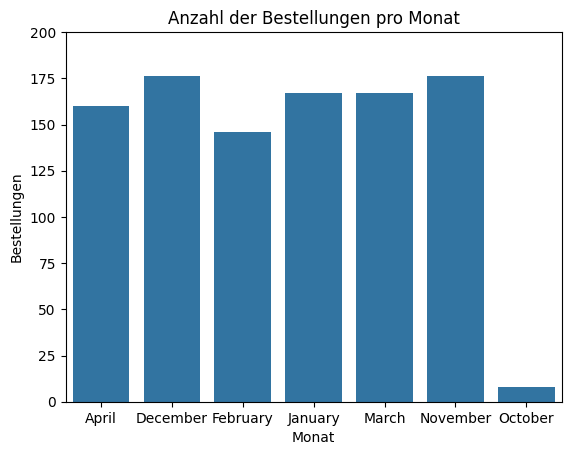

In [11]:
s = sns.barplot(df_months_mine, x="month_name", y="Bestellungen")
s.set(ylim=(0,200), title="Anzahl der Bestellungen pro Monat", xlabel="Monat", ylabel="Bestellungen")

[(0.0, 200.0),
 Text(0.5, 1.0, 'Anzahl der Bestellungen pro Monat'),
 Text(0.5, 0, 'Monat'),
 Text(0, 0.5, 'Bestellungen')]

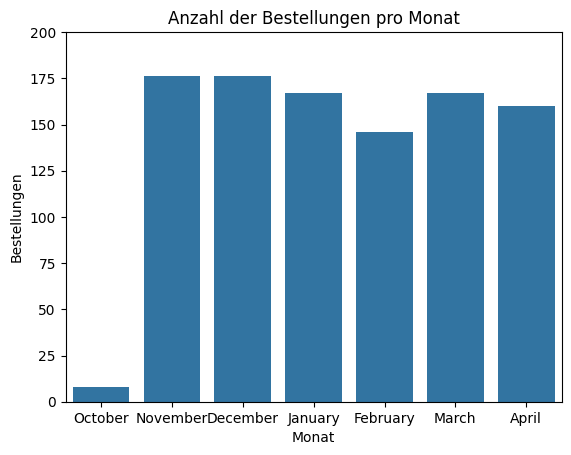

In [12]:
s = sns.barplot(month_totals, x="month_name", y="order_count")
s.set(ylim=(0,200), title="Anzahl der Bestellungen pro Monat", xlabel="Monat", ylabel="Bestellungen")

In [13]:
df.to_csv("documents/edited_sales.csv")